Assignment 1 (Face Recognition)
-------------------


Please read following instructions carefully:
 - To complete the assignment you will have to start early (start now).
 - No form of Plagiarism will be tolerated and you will be awarded straight zero, if found involved in any unethical practice.
 - Submit this completed notebook with its solution's pdf (simply click  on the File and then on click on pdf).
 - If you have any question, please ask on the Piazza.

In this task you will implement a naive and a SVD based face recognition systems. Helping code and the database of images is also being provided. Your task will be understand the provided code and add the following missing parts to complete the implementation of face-recognition system. 

Your ultimate goal is to given a query face image find a matching face (if any) from a set (database) of images.

In [1]:
%pylab inline
#configuring of display style
#plt.style.use('fivethirtyeight')
rcParams['figure.figsize']=(8,8) 

Populating the interactive namespace from numpy and matplotlib


#### Task 1: Mean Image
Compute the mean image from a given collection of images.


In [2]:
#import io for basic processing
from skimage import io

In [3]:
def meanImage(path):
    """
        function reads all the images (of same dimensions) at given path 
        and generate a single mean image..
        
        input: 
            path: image name pattern (such as *.png, *.jpg) + path of folder containing images...
        
        returns:
            mimage: mean image computed from the images
            
        Hint: Use io.imread_collection function to simplify the task..
        Also remember dividing int by int result in int.
    """
    ans=io.imread_collection(path)
    return np.mean(ans,axis=0).astype(np.uint8)

In [4]:
#lets call the function and plot the mean image
mimage=meanImage('./dataset/images-original/*') 

In [5]:
print mimage.shape

(243, 320)


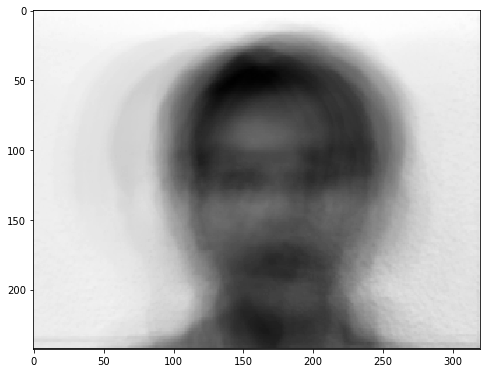

In [6]:
#displaying the mean image...
plt.imshow(mimage,cmap='gray', interpolation='nearest')

#### Task 2: Naive Face Recognition
In this part you will implement a naive-face recognition system. Here naive means you will load the training and test (query) images and then try to find the query's matching face by just finding $L_2$ distance between the query image and all of the database images. The database image which will have the shortest distance you will return it as a matched image. 

Perform this step on all the test images and report the accuracy of the your naive system.


In [7]:
#lets load the dataset

In [8]:
trainMat,trainLabel,testMat,testLabel=np.load('./dataset/face-dataset.npy')

In [9]:
print trainMat.shape, trainLabel.shape # number of database images and dimension of each image
print testMat.shape, testLabel.shape # number of test images and dimension of each image

(105, 77760) (105, 1)
(60, 77760) (60, 1)


In [10]:
##### Your code goes here for finding the accuracy on test set for your algorithm

accuracy=0;

#Please write your code here...
for te_no in arange(0,testMat.shape[0]):
    diff=trainMat-testMat[te_no]
    diff=sum(diff**2,axis=1)
    ind=argmin(diff)
    if(testLabel[te_no]==trainLabel[ind]):
        accuracy+=1
        

accuracy=accuracy/float(testMat.shape[0]);
#imshow(testMat[1].reshape(320,243),cmap='gray')

In [11]:
print accuracy*100

98.3333333333


#### Task 3: SVD based Face Recognition
In this part you will implement a SVD based face recognition system. Follow these steps to produce the final system.

- Given a database of $n$ images, we will represent each $p \times q $ database image by a column vector of dimension $m = pq \times 1$ (where each example will be a point in $m$ dimensional space) and stack all these $n$ database examples column-wise to form a training data matrix $M$ of dimensions $m\times n$. **This has been already done in trainMat and testMat**


- Next learn an SVD to find a set of $k$  discriminant dimensions that carry the most significant information (dimensions with high variance == dimensions corresponding to highest singular values). The  value of $k$ will be inferred using the magnitude of $\sigma$'s values, only some small number of $\sigma$'s with high magnitude values will be chosen on empirical bases *(Usually $\sigma$'s that cumulatively define 90\% of variation of data are chosen as the representative scale.)*. The $u$ vectors corresponding to these sigma values will define the orthogonal basis of the input $k$ dimensional space. These orthogonal vectors are also called the principal components and this whole process of finding basis this way is called principal component analysis.

In [12]:
#Your code goes here...
#import warnings
#warnings.filterwarnings('error')

# First normalize your train and test matrices by subtracting mean and dividing by std.
stdevs=np.std(trainMat,axis=0)
stdevs[stdevs==0]=1
meantr=mean(trainMat,axis=0)
ntrainMat=(trainMat-meantr)/stdevs
print (ntrainMat.shape)


(105, 77760)


In [13]:
# Now go and compute SVD

u,s,v=np.linalg.svd(transpose(ntrainMat),full_matrices=False)


 - Once you know the basis of space we can define any vector in $k$ dimensional space using linear combination of these basis vectors. Here we will pick the first $k$ principal components and stack them column-wise to build new basis (also called projection) matrix $W_{m\times k}$ for $k$ dimensional space $k<n$. Following figure shows the top 16 principal components drawn in the form of images.

In [14]:
csum=np.cumsum(s)
w = u[:, 0:16]
print w.shape

(77760, 16)


In [15]:
csum=np.cumsum(s)
w1 = u[:, 0:16]
print w1.shape

(77760, 16)


In [16]:
csum=np.cumsum(s)
w = (u[:, 0:30])
print w.shape

(77760, 30)


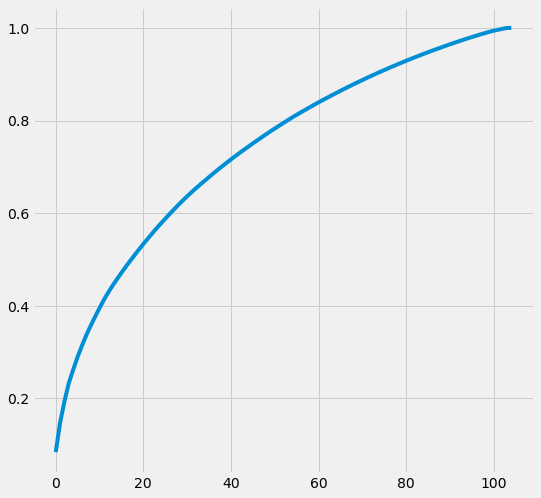

In [17]:
plt.style.use('fivethirtyeight')
plt.plot(csum/csum[-1])

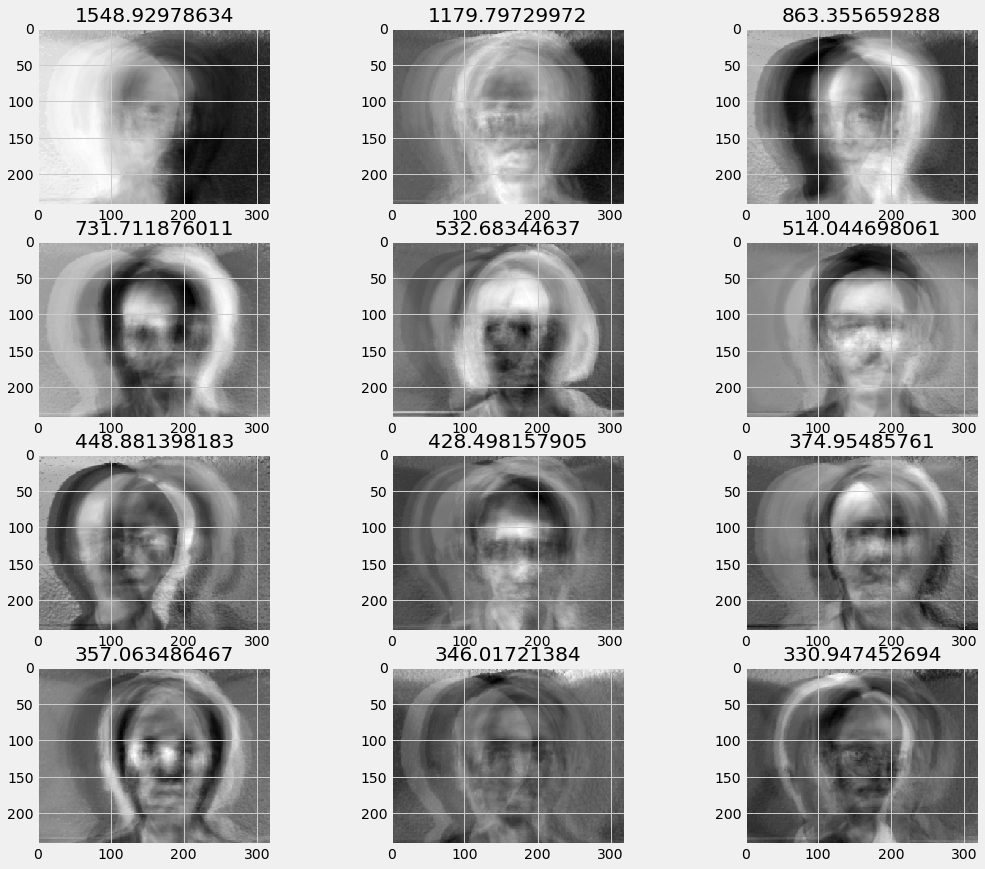

In [18]:
#lets plot the first 16 principal components 
#'12 top principal components shown in the form of images. 
# Each component singular value is written on top of it. Notice that how quickly the value drops')
plt.rcParams['figure.figsize']=(16,14)
for i in range(12):
    plt.subplot(4,3,i+1)
    plt.imshow(np.reshape(w[:,i],(243,-1),order='F'),cmap='gray',interpolation='nearest')
    plt.title(str(s[i]))

 - Now given an query test image $T$ of dimensions $p \times q $, first you will stretch it to form a $m\times1,\; \mbox{ where } m=pq$ column vector *{Recall that taking dot product of vector $a$ with another unit vector $b$ is same as finding the length of vector component of $a$ along $b$ or in other words $a.b$ equal to length of projected vector $a$ onto $b$. In other words taking a dot product of vector $a$ with a basis vector $b$ tells us about the basis vector contribution in the construction of vector.* Next to define $T_{m\times 1}$ in terms of $W_{m\times k}$ we will simply multiply the vector $T$ with $W_{m\times k}^T$ matrix to get a $k$-dimensional projection vector $t_{k\times1}$.
\begin{equation}
  t_{k\times 1} = W_{m\times k}^T *T_{m\times 1}
\end{equation}
This  vector $t$ components tell us about the contribution of each principal component (basis vector $u_i$)  in the construction of $T$. In other words it tells us how can we reconstruct (represent) our $T$ as linear combination of $u_i$'s, \ie
\begin{equation}
  T_{m\times 1} = W_{m\times k} * t_{k\times 1},\;\mbox {where } W^T=W^{-1}
\end{equation}

  Hence you will representing each test example $T$ as weights $t$ on principal components.


 - Next, we you will project each database example as well using the above mentioned step.

In [19]:
#Using K around 30 gives as good as accuracy while using all the dimensions

In [20]:
#Project your training and test data...u[:,0:k]
# ptrain should contain the projected training set
k=30
ptrain=dot(ntrainMat,w).astype(int)

# ptest should contain the projected test set...
ptest=dot((testMat-meantr)/stdevs,w).astype(int)
#print (ptest.T.shape)

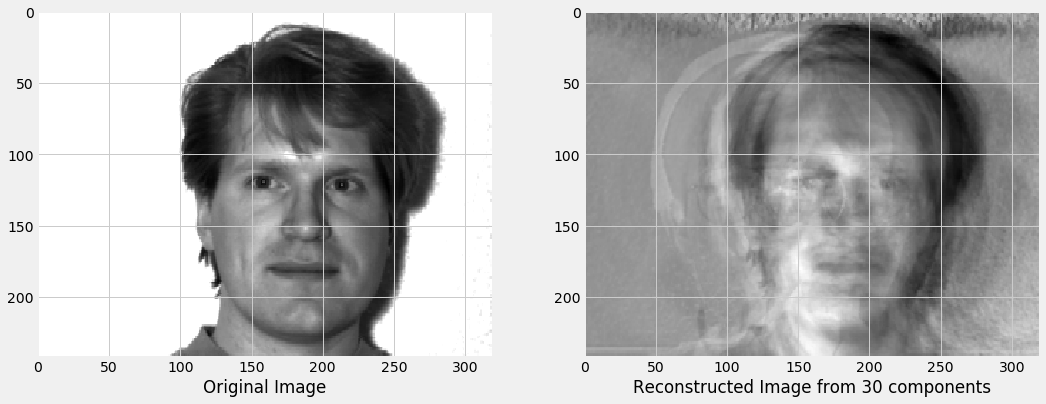

In [21]:
#Lets take first example and show its reconstruction using basis vectors...
plt.subplot(1,2,1)
plt.imshow(trainMat[0,:].reshape(mimage.shape,order='F'),cmap='gray')
plt.xlabel('Original Image')
plt.subplot(1,2,2)
plt.imshow(np.dot(w,ptrain[0,:].T).reshape(mimage.shape,order='F'),cmap='gray')
plt.xlabel('Reconstructed Image from 30 components')

 - Finally, You will simply compute the $L_2$ distance between the test example $t$ and each of the database example in $k$ dimensional space and return the label (name) of the example (person) which has minimum distance with the test example $t$ as our target person.

In [22]:
accuracy=0;

# Your code goes here
np.dot(w,ptest[0,:].T).reshape(mimage.shape,order='F')

accuracy=0;

#Please write your code here...
for t_no in arange(0,ptest.shape[0]):
    #reconstructedimage=dot(w,ptest[tno,:].T)
    diff=ptrain-ptest[t_no,:]
    diff=sum(diff**2,axis=1)
    ind=argmin(diff)
    if(testLabel[t_no]==trainLabel[ind]):
        accuracy+=1


accuracy=accuracy/float(ptest.shape[0]);

In [23]:
print accuracy * 100

98.3333333333


Now take couple of your own and your friend pictures and add them to database. Project these images to $W$ matrix and display the resultant images and see how you look. Furthermore repeat the above process but use your own and friend face image as query and comment on the performance of the system. 

Finally, construct your images from the basis and submit your own images constructed using 30, 50, 70 components. **For this part you will submit your own reconstructed face images.**

In [24]:
def rgb2gray(im):
    """
        input: 
            im: a color image
        returns:
            oim: a gray scale image
    """
    return ((im[:,:,0]*0.289)+(im[:,:,1]*0.5870)+(im[:,:,2]*0.1140)).astype(np.uint8)

In [33]:
# YOUR CODE HERE
#saving to a datbase
import scipy.misc as sm
pathl='./dataset/new-pics/*'
newpics=io.imread_collection(pathl)
strpics=zeros((len(newpics),mimage.size))
for i in arange(0,len(newpics)):
    tempi=sm.imresize(rgb2gray(newpics[i]).copy(),mimage.shape)
    strpics[i]=tempi.flatten(order='F')
    np.append(trainMat,[strpics[i]],axis=0)
strpicslabels=zeros((len(newpics),1))
strpicslabels[0:4,0]=0
strpicslabels[4:,0]=1
for i in arange(0,4):
    np.append(trainLabel,[[0]],axis=0)
for i in arange(0,4):
    np.append(trainLabel,[[1]],axis=0)
np.save('./dataset/newpics.npy',strpics)
np.save('./dataset/newpicslab.npy',strpicslabels)



In [ ]:
def find_accuracy(ptest,ptrain,testLabel,trainLabel):
    for t_no in arange(0,ptest.shape[0]):
        diff=ptrain-ptest[t_no,:]
        diff=sum(diff**2,axis=1)
        ind=argmin(diff)
        if(testLabel[t_no]==trainLabel[ind]):
            accuracy+=1
    return accuracy=accuracy/float(ptest.shape[0]);

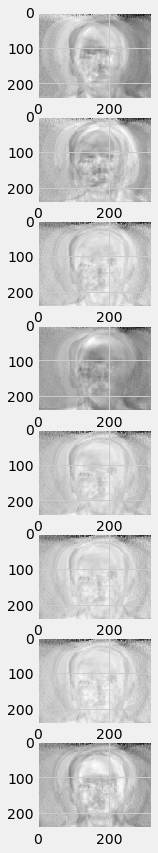

In [27]:
csum=np.cumsum(s)
w = u[:, 0:30]
newtestn=dot((strpics-meantr)/stdevs,w).astype(int)
reconstructed_images=np.dot(newtestn,w.T)

figure,axis=plt.subplots(newtestn.shape[0])
for i in arange(0,newtestn.shape[0]):
    axis[i].imshow(reconstructed_images[i].reshape(mimage.shape,order='F'),cmap='gray')


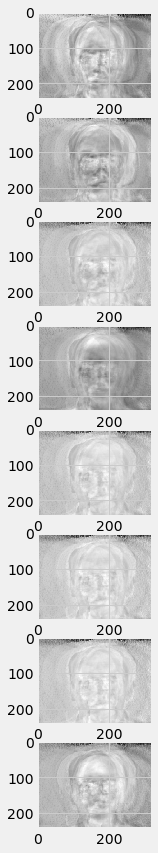

In [28]:
csum=np.cumsum(s)
w = u[:, 0:50]
newtestn=dot((strpics-meantr)/stdevs,w).astype(int)
reconstructed_images=np.dot(newtestn,w.T)

figure,axis=plt.subplots(newtestn.shape[0])
for i in arange(0,newtestn.shape[0]):
    axis[i].imshow(reconstructed_images[i].reshape(mimage.shape,order='F'),cmap='gray')


In [ ]:
csum=np.cumsum(s)
w = u[:, 0:70]
newtestn=dot((strpics-meantr)/stdevs,w).astype(int)
reconstructed_images=np.dot(newtestn,w.T)

figure,axis=plt.subplots(newtestn.shape[0])
for i in arange(0,newtestn.shape[0]):
    axis[i].imshow(reconstructed_images[i].reshape(mimage.shape,order='F'),cmap='gray')
